In [152]:
# Code for Task 1
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

#read csv file into dataFrame
stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv")
games = pd.read_csv("data/afl/games.csv")

# display a list of players
#player=input ([players["displayName"]])
#player=players["displayName"]=="Franklin, Lance"

#display columns of each table
'''
display (players.columns)
display (games.columns)
display (stats.columns)
'''

# merge on playerId and display & displayName to avoid duplicate columns being created
merge_playerStats = players.merge(stats, how="inner", on=["playerId","displayName"])
#display ("Player Stats ====================================")
#display (merge_playerStats)


# create GamePlayer Stats data frame and merge on gameId and playerId
merge_GamePlayerStats = merge_playerStats.merge(games, how="inner", on=["gameId",'year','round'])
#display ("Game player Stats ====================================")
#display (merge_GamePlayerStats)
#display ("==== Data Frames Merged ================================")


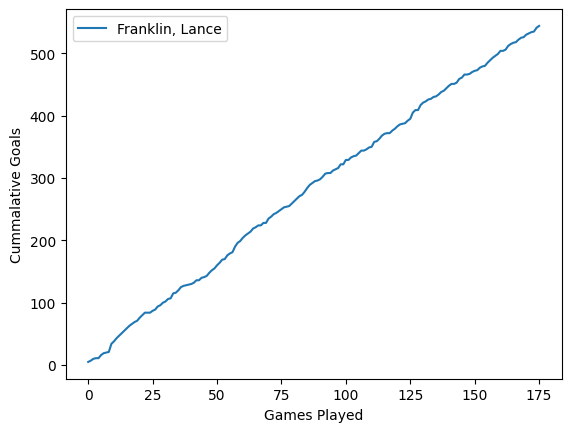

In [153]:
# Code for Task 2
# mask data  based on displayName
playerName='Franklin, Lance' 
playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==playerName]

# sort and then re-index on game number to get graph to populate from zero
# assumption is gamenumber is unique
playerStats=playerStats.sort_values(by='gameNumber') 
#playerStats=playerStats.set_index("gameNumber")
#display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])

cumulative=playerStats["Goals"].cumsum()
cumulative=cumulative.reset_index(drop=True)
#display (cumulative)
canvas = cumulative.plot(kind="line", ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)


Analysis of the plot produced in Task 2

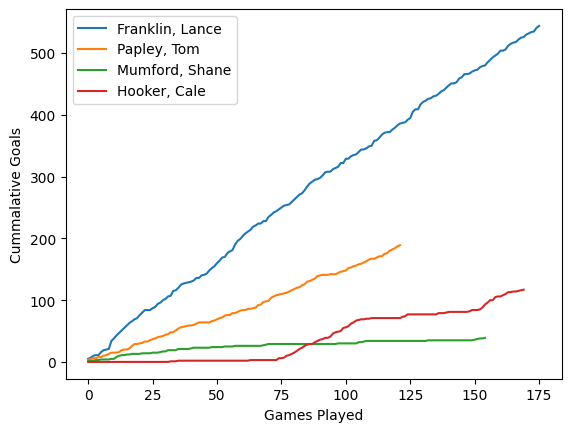

In [192]:
# Code for Task 3

# mask data  based on playerId 
players=["Franklin, Lance","Papley, Tom","Mumford, Shane","Hooker, Cale"]


for playerName in players:

    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==playerName]
    playerStats=playerStats.sort_values(by='gameNumber') 
    #playerStats=playerStats.set_index("gameNumber")
    #playerStats=playerStats.reset_index()
    
    #display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    
    cumulativeGoals=playerStats["Goals"].cumsum()
    cumulativeGoals=cumulativeGoals.reset_index(drop=True)
    #display(cumulativeGoals) 
    canvas = cumulativeGoals.plot(kind='line', x='gameNumber', y='cumulativeGoals', ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)
    

    

Analysis of the plot produced in Task 3

'\n    coefficients = np.polyfit(gameNumber, cumulativeGoals, 1)\n    # - Creating the function / formula, that we can use -\n    f = np.poly1d(coefficients)  \n \n    # - Using our function / formula to generate predictions -\n    cumulativeGoals["prediction"] = f(playerStats["gameNumber"])\n\n    #display (playerStats["prediction"])\n    # - Plotting everything -\n    #canvas = playerStats.set_index(\'gameNumber\')[\'cumulative\'].plot(kind=\'line\', legend=True)\n    canvas = playerStats.set_index(\'gameNumber\')[\'cumulative\'].plot(kind=\'line\', legend=True)\n\n    #canvas = playerStats.plot(kind="line", x="gameNumber", y="cumulative")\n    #playerStats.plot(kind=\'line\', x=176, y=\'prediction\', color=\'pink\', ax=canvas) \n    # - Plotting everything -\n    #canvas = playerStats.set_index(\'gameNumber\')[\'cumulativeGoals\'].plot(kind=\'line\', legend=True)\n'

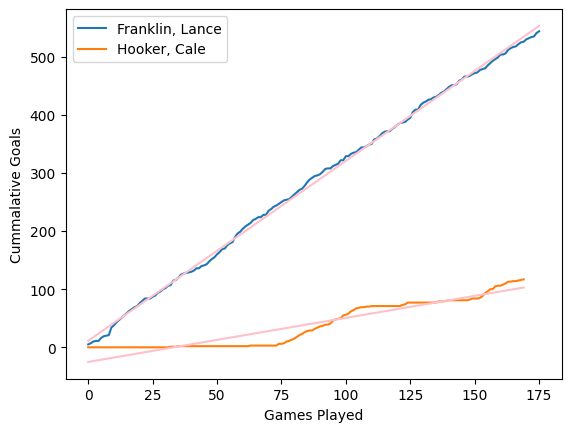

In [195]:
# Code for Task 4
# mask data  based on playerName


players=["Franklin, Lance","Hooker, Cale"]


for playerName in players:

    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==playerName]
    
    playerStats=playerStats.sort_values(by='gameNumber') 
    playerStats=playerStats.reset_index(drop=True)
   
    #display (playerStats[["gameId","date","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    playerStats.insert(1,"cumulativeGoals",playerStats["Goals"].cumsum())
    
    playerStats.reset_index(drop=True)

    coefficients = np.polyfit(playerStats['gameNumber'], playerStats['cumulativeGoals'], 1)
    # - Creating the function / formula, that we can use -
    f = np.poly1d(coefficients)  
 
    # - Using our function / formula to generate predictions -
    playerStats["prediction"] = f(playerStats["gameNumber"])

    canvas = playerStats['cumulativeGoals'].plot(kind='line', x='gameNumber',y="cumulativeGoals", ylabel="Cummalative Goals", xlabel="Games Played", legend=True, label=playerName)
    playerStats["prediction"].plot(kind='line', x='gameNumber', y='prediction', color='pink', ax=canvas) 



Analysis of the plot produced in Task 4